In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle

In [11]:

train_dir = r"C:\0-College\AI\Semester_2\AIDI-2000-Applied_ML\Assignments\Final\archive\New_Plant_Diseases_Dataset\train"
valid_dir = r"C:\0-College\AI\Semester_2\AIDI-2000-Applied_ML\Assignments\Final\archive\New_Plant_Diseases_Dataset\valid"



In [12]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)



Found 64368 images belonging to 36 classes.
Found 16098 images belonging to 36 classes.


In [13]:
# Build the CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=100, 
    validation_data=valid_generator,
    callbacks=[early_stopping]
)

Epoch 1/100


C:\Users\ricpa\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2012/2012 ━━━━━━━━━━━━━━━━━━━━ 548s 271ms/step - accuracy: 0.5286 - loss: 1.6626 - val_accuracy: 0.8213 - val_loss: 0.5835
Epoch 2/100
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 519s 258ms/step - accuracy: 0.8878 - loss: 0.3578 - val_accuracy: 0.8937 - val_loss: 0.3347
Epoch 3/100
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 497s 247ms/step - accuracy: 0.9478 - loss: 0.1611 - val_accuracy: 0.8796 - val_loss: 0.3900
Epoch 4/100
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 509s 253ms/step - accuracy: 0.9660 - loss: 0.1044 - val_accuracy: 0.8758 - val_loss: 0.4509
Epoch 5/100
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 511s 254ms/step - accuracy: 0.9766 - loss: 0.0727 - val_accuracy: 0.8946 - val_loss: 0.4142
Epoch 6/100
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 505s 251ms/step - accuracy: 0.9813 - loss: 0.0565 - val_accuracy: 0.8794 - val_loss: 0.5143
Epoch 7/100
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 518s 257ms/step - accuracy: 0.9801 - loss: 0.0584 - val_accuracy: 0.8858 - val_loss: 0.5501


In [15]:
# Save the model as a pickle file
model_filename = 'plant_disease_cnn_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)



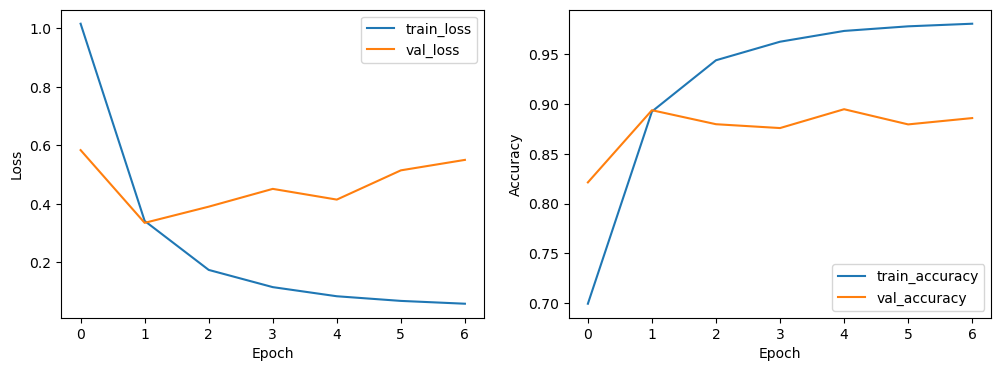

In [16]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


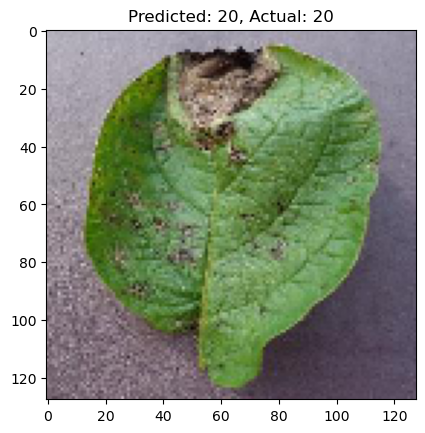

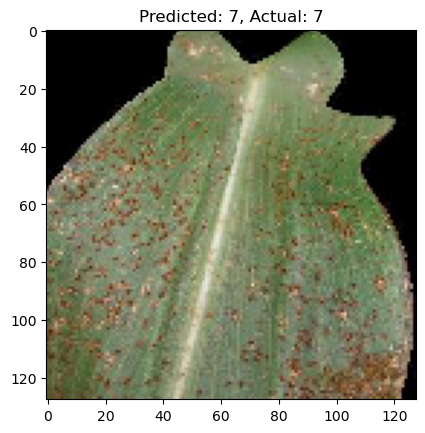

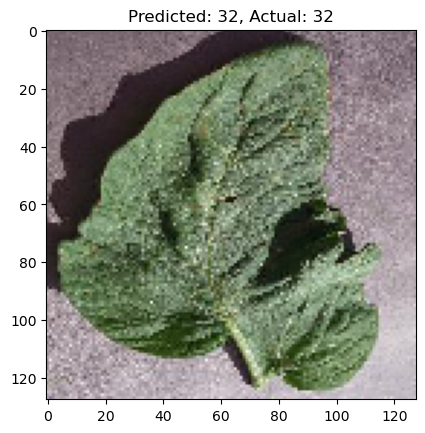

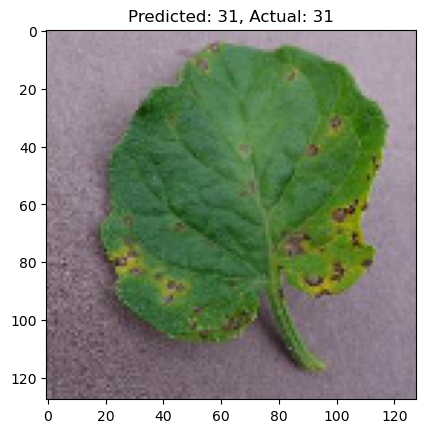

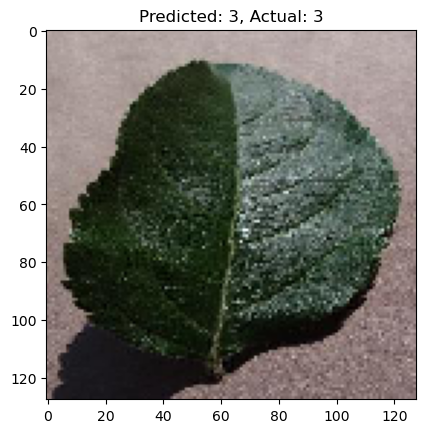

In [17]:
# Load the model and make predictions on sample images
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Predict on a few validation images
validation_images, validation_labels = next(valid_generator)
predictions = loaded_model.predict(validation_images)

# Display predictions
for i in range(5):
    plt.imshow(validation_images[i])
    plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(validation_labels[i])}')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


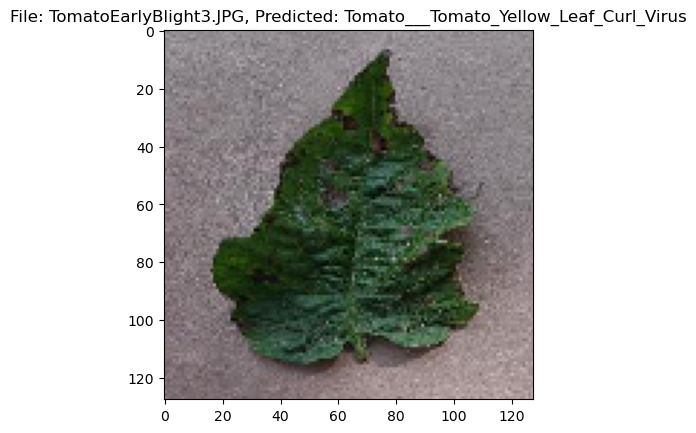

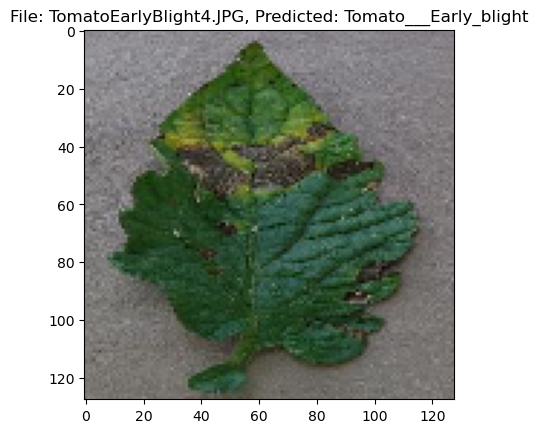

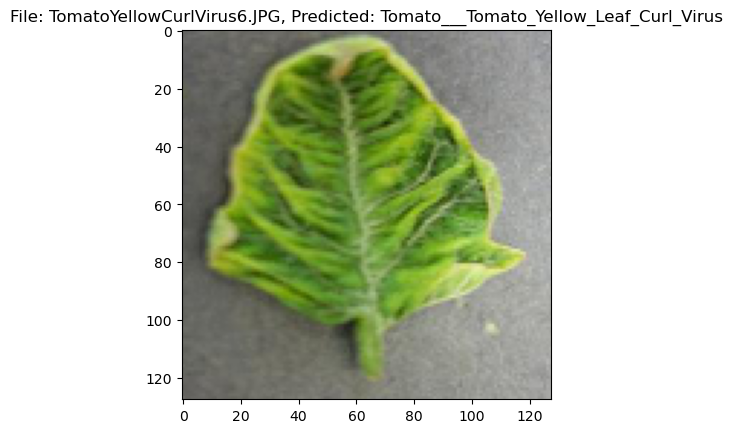

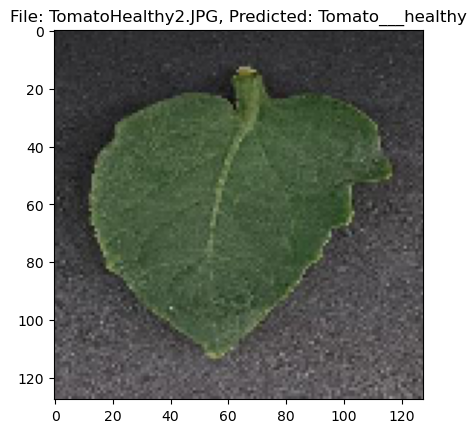

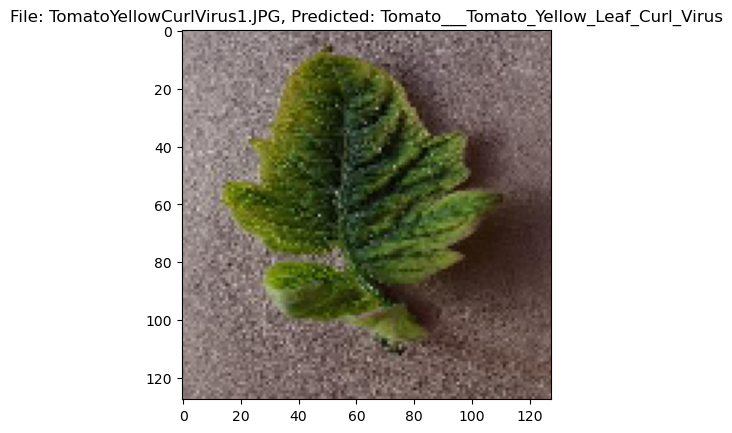

In [20]:
import os
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pickle

# Path to the test directory
test_dir = r"C:\0-College\AI\Semester_2\AIDI-2000-Applied_ML\Assignments\Final\archive\test\test"

# Load the trained model
model_filename = 'plant_disease_cnn_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Load the class indices and create a reverse mapping
train_generator.class_indices
class_indices = train_generator.class_indices
reverse_class_indices = {v: k for k, v in class_indices.items()}

# Load and preprocess test images
test_images = []
test_filenames = []
for filename in os.listdir(test_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(test_dir, filename)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        test_images.append(img_array)
        test_filenames.append(filename)

# Ensure we don't request more samples than available
num_samples = min(5, len(test_images))

# Select a few random images for prediction
selected_indices = random.sample(range(len(test_images)), num_samples)
selected_images = [test_images[i] for i in selected_indices]
selected_filenames = [test_filenames[i] for i in selected_indices]

# Convert to numpy array
selected_images = np.array(selected_images)

# Make predictions
predictions = loaded_model.predict(selected_images)

# Display predictions with filenames
for i in range(num_samples):
    predicted_class_index = np.argmax(predictions[i])
    predicted_class_label = reverse_class_indices[predicted_class_index]
    plt.imshow(selected_images[i])
    plt.title(f'File: {selected_filenames[i]}, Predicted: {predicted_class_label}')
    plt.show()
